In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

[*********************100%***********************]  49 of 49 completed

1 Failed download:
['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\thiag\AppData\Local\Temp\ipykernel_9560\1473396248.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()
F:\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
F:\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
F:\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
F:\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by 

Pesos Ótimos da Carteira: [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816]
Retorno Esperado: 0.0 , Risco: nan


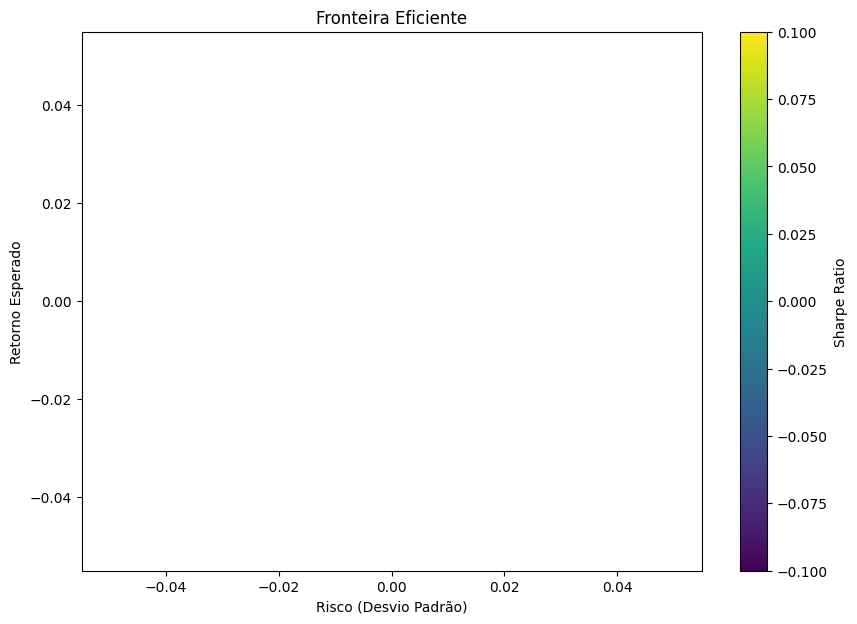

In [2]:
# Definir os 50 tickers de interesse
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'JNJ', 
           'V', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'VZ', 'ADBE', 'NFLX', 'CRM', 
           'INTC', 'KO', 'CMCSA', 'PEP', 'PFE', 'CSCO', 'XOM', 'T', 'ABT', 'NKE', 
           'MRK', 'BA', 'WMT', 'MCD', 'AMD', 'MMM', 'IBM', 'ORCL', 'GE', 
           'HON', 'TXN', 'AMGN', 'LOW', 'CAT', 'SPGI', 'MS', 'INTU', 'LMT', 'CVX']

# Coleta de dados de ativos via Yahoo Finanças
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().dropna()
    return returns

# Função para calcular o desempenho da carteira
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return returns, risk

# Função objetivo para maximizar o Sharpe Ratio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_risk = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_risk

# Função de restrição (total dos pesos igual a 1)
def check_sum(weights):
    return np.sum(weights) - 1

# Função para otimizar a carteira
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': check_sum})
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets], args=args, 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Visualização dos resultados
def plot_efficient_frontier(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    results = np.zeros((3, num_assets))
    for i in range(num_assets):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_return, portfolio_risk = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_risk
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_risk

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Fronteira Eficiente')
    plt.xlabel('Risco (Desvio Padrão)')
    plt.ylabel('Retorno Esperado')
    plt.show()

# Coleta de dados e execução da otimização
start_date = '2020-01-01'
end_date = '2023-01-01'
returns = get_data(tickers, start_date, end_date)
mean_returns = returns.mean()
cov_matrix = returns.cov()

optimized_results = optimize_portfolio(mean_returns, cov_matrix)

# Exibindo os resultados otimizados
optimal_weights = optimized_results.x
portfolio_return, portfolio_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
print("Pesos Ótimos da Carteira:", optimal_weights)
print("Retorno Esperado:", portfolio_return, ", Risco:", portfolio_risk)

# Plot da fronteira eficiente
plot_efficient_frontier(mean_returns, cov_matrix)
